<a href="https://colab.research.google.com/github/dahiya-04/pytorch_from_basic/blob/main/day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                               dtype=torch.float), # Changed dtypes to dtype
                                    requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1,
                                             dtype=torch.float), # Changed dtypes to dtype
                                 requires_grad=True)
    def forward(self, x:torch.Tensor):
        return self.weights * x + self.bias



In [ ]:
#SET MANUAL SEED SINCE NN.Parameter are randomly initialised
torch.manual_seed(42)

model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
#data
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [ ]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [ ]:
with torch.inference_mode():
    y_preds = model_0(X_test)

In [ ]:
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
#Train model
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)


In [ ]:
torch.manual_seed(42)
epochs = 200

for epoch in range(epochs):
    model_0.train()
    y_pred = model_0(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #for model testing
    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test)

        if epoch % 10 == 0:
            print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
Epoch: 70 | Loss: 0.03476089984178543 | Test loss: 0.0805937647819519
Epoch: 80 | Loss: 0.03132382780313492 | Test loss: 0.07232122868299484
Epoch: 90 | Loss: 0.02788739837706089 | Test loss: 0.06473556160926819
Epoch: 100 | Loss: 0.024458957836031914 | Test loss: 0.05646304413676262
Epoch: 110 | Loss: 0.021020207554101944 | Test loss: 0.04819049686193466
Epoch: 120 | Loss: 0.01758546568453312 | Test loss: 0.04060482233762741
Epoch: 130 | Loss: 0.014155393466353416 | Test loss: 0.03233227878808975
Ep

In [ ]:
#predicction of trained model
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
#saving and loading pytorch model
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = "01_pytorch_workflow.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

In [ ]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


##for GPU running

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [2]:
torch.__version__

'2.6.0+cu124'

In [4]:
weight = 0.7
bias = 0.4

start = 0
end =1
step = 0.04

x = torch.arange(start,end,step=step).unsqueeze(dim=1)
y = weight * x + bias


train_split = int(0.8 * len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

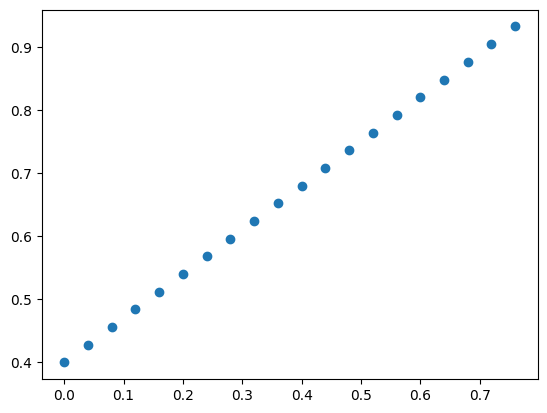

In [6]:
plt.scatter(x=x_train, y=y_train)

In [15]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)

    def forward(self,x:torch.Tensor):
          return self.linear_layer(x)

torch.manual_seed(44)
model_1 = LinearRegressionModelV2()
model_1,model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.4392]])),
              ('linear_layer.bias', tensor([0.4614]))]))

In [9]:
next(model_1.parameters()).device

device(type='cpu')

In [17]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [18]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.04)

In [19]:
torch.manual_seed(42)
epochs = 200


X_train = x_train.to(device)
y_train = y_train.to(device)
X_test = x_test.to(device)
y_test = y_test.to(device)
for epoch in range(epochs):

  model_1.train

  y_pred = model_1(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  model_1.eval()

  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.05892067030072212 | Test loss: 0.14090321958065033
Epoch: 10 | Loss: 0.03585682809352875 | Test loss: 0.08188247680664062
Epoch: 20 | Loss: 0.022048823535442352 | Test loss: 0.04933856800198555
Epoch: 30 | Loss: 0.008697643876075745 | Test loss: 0.00654182443395257
Epoch: 40 | Loss: 0.021184993907809258 | Test loss: 0.01306139212101698
Epoch: 50 | Loss: 0.021184993907809258 | Test loss: 0.01306139212101698
Epoch: 60 | Loss: 0.021184993907809258 | Test loss: 0.01306139212101698
Epoch: 70 | Loss: 0.021184993907809258 | Test loss: 0.01306139212101698
Epoch: 80 | Loss: 0.021184993907809258 | Test loss: 0.01306139212101698
Epoch: 90 | Loss: 0.021184993907809258 | Test loss: 0.01306139212101698
Epoch: 100 | Loss: 0.021184993907809258 | Test loss: 0.01306139212101698
Epoch: 110 | Loss: 0.021184993907809258 | Test loss: 0.01306139212101698
Epoch: 120 | Loss: 0.021184993907809258 | Test loss: 0.01306139212101698
Epoch: 130 | Loss: 0.021184993907809258 | Test loss: 0.013061392

In [20]:
!git clone https://github.com/dahiya-04/pytorch_from_basic.git

Cloning into 'pytorch_from_basic'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (9/9), 6.13 KiB | 6.13 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [21]:
!cd pytorch_from_basic

In [22]:
!cp "/content/colab day2.ipynb" "pytorch_from_basic/"


cp: cannot stat '/content/colab day2.ipynb': No such file or directory


In [23]:
!ls /content/


pytorch_from_basic  sample_data
